In [96]:
data = csvread('flights.csv');

In [97]:
mu = mean(data(:,2))

mu =  169.01


In [98]:
len = length(data);
for i=1:len
    if data(i,2) == 0
        data(i,2) = NaN;
    endif
endfor

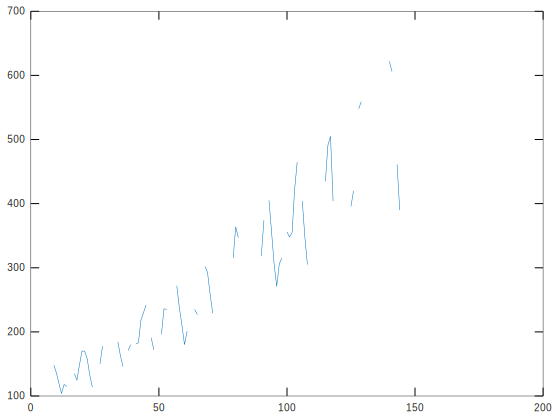

In [269]:
plot(data(:,2));

In [292]:
G_x = zeros(141,4);
G_a = zeros(141,145);

In [293]:
g = data(1:145,2);
for i=1:145
    if isnan(g(i))
        g(i) = rand();
    endif
endfor
for i=1:141
    for j=1:4
        G_x(i,5-j) = g(i+j-1);
    endfor
endfor
b = g(5:145);

In [294]:
g(1:10)

ans =

   7.1280e-01
   1.1200e+02
   1.7572e-01
   6.0948e-01
   1.2900e+02
   7.9882e-02
   1.3500e+02
   6.6504e-01
   1.4800e+02
   1.3600e+02



In [295]:
ind_ob = [];

In [296]:
for i=1:145
    if isnan(data(i,2))==0
        %X_ob(ob_it,1)=data(i,2);
        ind_ob(i) = 1;
        #ob_it = ob_it + 1;
    else
        ind_ob(i) = 0;
        %X_mi(mi_it,1)=data(i,2);
        %mi_it = mi_it + 1;
    endif
endfor
ind_ob = logical(ind_ob);

In [299]:
for e=1:20
    for i=1:141
        for j=1:4
            G_x(i,5-j) = g(i+j-1);
        endfor
    endfor
    b = g(5:145);
    [Q, R] = qr(G_x);
    A = flipud(linsolve(R, Q' * b));
    for i=1:141
        for j=1:4
            G_a(i,i-1+j) = A(j);
        G_a(i,i+4) = -1;
        endfor
    endfor
    [Q_a, R_a] = qr(G_a(:,!ind_ob));
    g_mi = linsolve(R_a, Q_a' * (-G_a(:,ind_ob) * g(ind_ob)));
    g(!ind_ob) = g_mi;
endfor

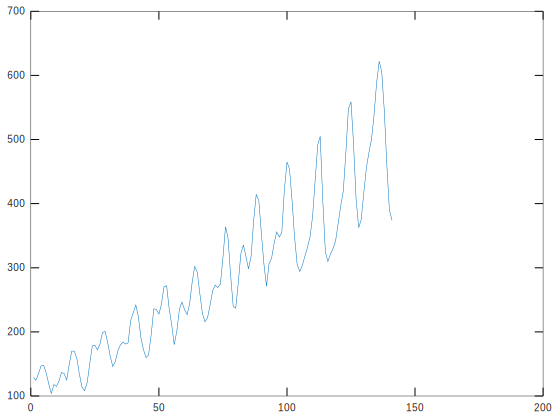

In [301]:
plot(g(5:145))

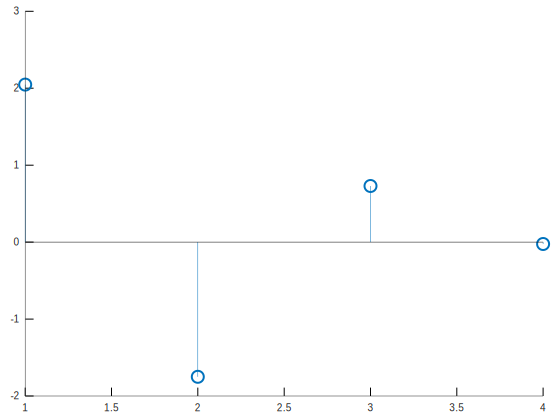

In [303]:
stem(flipud(A));